<a href="https://colab.research.google.com/github/priyachittamuru/CNN/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONVOLUTIONAL NEURAL NETWORK (CNN)**
## **Source :** - [Fashion MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist)

## **Table of Contents**
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example of how the data looks (each class takes three-rows):
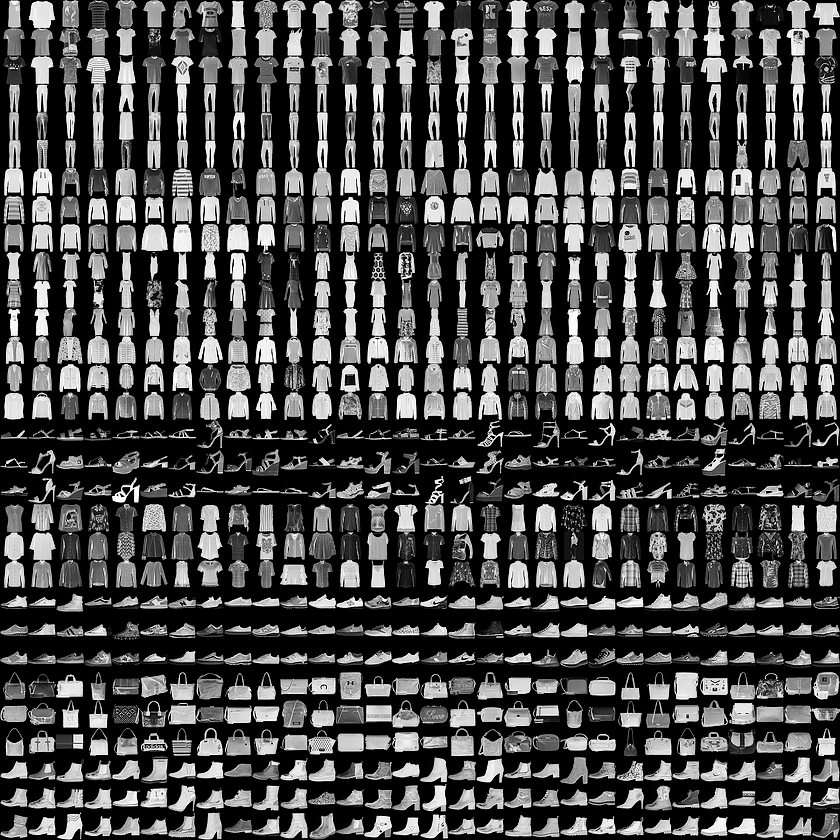

In [2]:
# cloning fashion mnist from git

!git clone https://github.com/zalandoresearch/fashion-mnist.git
%cd fashion-mnist/data/raw/
!ls

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'fashion-mnist/data/raw/'
/content
fashion-mnist  sample_data


In [39]:
# Importing Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [4]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- There are 10 output classes namely  **'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'**

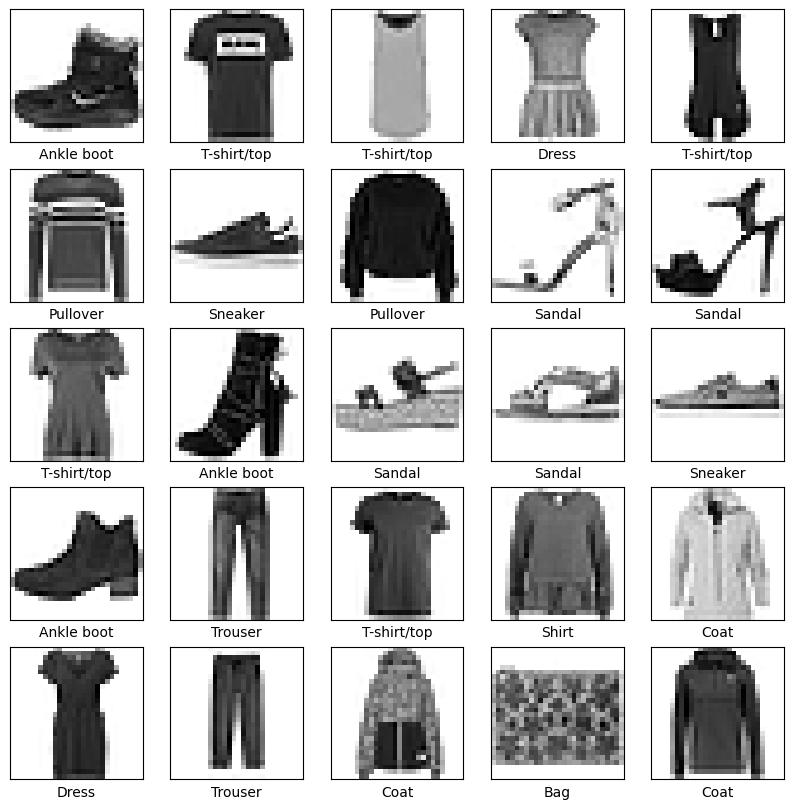

In [6]:
# Visualize sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

-Visual representation of clases althought there are only 10 classes multiples images belong to same class.

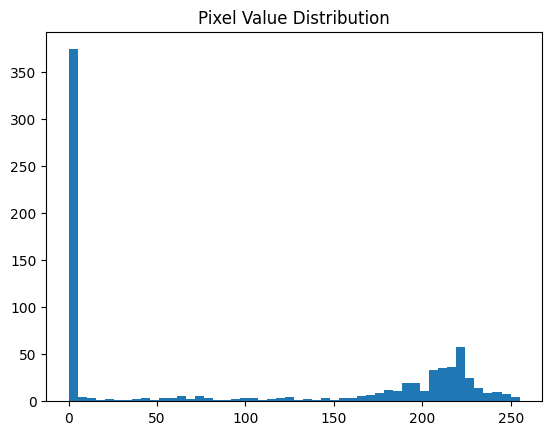

In [7]:
# Pixel value distribution
plt.hist(train_images[0].flatten(), bins=50)
plt.title("Pixel Value Distribution")
plt.show()

### Pixel Value Distribution - Brief Inference

- The histogram shows the distribution of pixel intensity values (0–255) in grayscale images.
- A large spike at **pixel value 0** indicates that many pixels are completely black (i.e., background).
- Another cluster of pixel values between **200–230** shows brighter areas — likely representing the actual fashion items.
- This implies that:
  - The images contain significant background.
  - Only a small portion of the image contains useful information.



In [8]:
# Normalize and reshape images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

- Normalize pixel values (e.g., scale from 0 to 1) for better model performance.

In [9]:
# One-hot encode labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

### One-Hot Encoding of Labels

- `tf.keras.utils.to_categorical()` converts **integer class labels** into **one-hot encoded vectors**.
- Example:
  - If `train_labels` = `[0, 1, 2]` and there are 3 classes,
  - One-hot encoding transforms this into:
    ```
    [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]
    ```
- ✅ This format is required for **multi-class classification** tasks when using a **softmax output layer**.
- Helps the model learn by comparing predicted probabilities with these binary class indicators using **categorical crossentropy** loss.


In [10]:
### Model Construction
def build_cnn_model():
    model = models.Sequential([
        # Feature extraction
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Classification
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])
    return model

model = build_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Feature Extraction Layers

- Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))

  This is the first convolutional layer. It uses 32 filters of size 3x3 and applies the ReLU activation function. The input shape indicates grayscale images of size 28x28.

- MaxPooling2D((2, 2))  

  This layer reduces the spatial dimensions of the feature maps by taking the maximum value over a 2x2 window, helping reduce computation and control overfitting.

- Conv2D(64, (3, 3), activation='relu')

  A second convolutional layer with 64 filters, also using ReLU. It learns more complex patterns from the features extracted by the previous layer.

- MaxPooling2D((2, 2))

  Another pooling layer to further downsample the spatial dimensions.

- Conv2D(64, (3, 3), activation='relu')

  A third convolutional layer for capturing high-level features.

---

#### Classification Layers

- Flatten()  

  Converts the multi-dimensional feature maps into a one-dimensional array to feed into fully connected (dense) layers.

- Dense(64, activation='relu')

  A fully connected layer with 64 neurons and ReLU activation.

- Dropout(0.5)

  Randomly drops 50% of the neurons during training to reduce overfitting.

- Dense(10, activation='softmax')
  
  The output layer with 10 neurons (for 10 classes). Softmax activation ensures the output represents class probabilities.




In [11]:
# Training & Validation
# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3)
]

# Train model
history = model.fit(train_images, train_labels,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.5902 - loss: 1.1578 - precision: 0.7882 - recall: 0.4244 - val_accuracy: 0.8234 - val_loss: 0.4815 - val_precision: 0.8942 - val_recall: 0.7436 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.8024 - loss: 0.5426 - precision: 0.8706 - recall: 0.7294 - val_accuracy: 0.8554 - val_loss: 0.3929 - val_precision: 0.8895 - val_recall: 0.8243 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.8356 - loss: 0.4550 - precision: 0.8851 - recall: 0.7840 - val_accuracy: 0.8658 - val_loss: 0.3669 - val_precision: 0.8988 - val_recall: 0.8328 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.8589 - loss: 0.3942 - precision: 0.8968 - recall: 0.8168 - val_accuracy: 0.8810 - val_loss: 0.3243 - val_precision: 0.9081 - val_recall: 0.8539 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step -

### Training & Validation – Brief Explanation

- **Callbacks**  
  - `EarlyStopping`: Stops training if validation performance does not improve for 5 consecutive epochs and restores the best weights.
  - `ReduceLROnPlateau`: Lowers the learning rate by a factor of 0.1 if validation accuracy stops improving for 3 epochs, allowing for better fine-tuning.

- **Model Training**  
  - Trains the model for up to 50 epochs on the training set, using 20% of it for validation.
  - Uses a batch size of 128 to process data efficiently.
  - The `history` object stores training and validation metrics for further analysis or visualization.


## **Brief Inference from Model Training**

- **Model Performance Improved Steadily**: Accuracy increased from **59.02%** (Epoch 1) to **94.70%** (Epoch 21), with decreasing loss, indicating effective learning.
- **Validation Accuracy** also improved, reaching **91.80%** by Epoch 21, showing good generalization to unseen data.
- **Precision and Recall** consistently improved for both training and validation, suggesting balanced performance across classes.
- **Learning Rate Adjustment**: The learning rate was reduced from 0.001 to 0.0001 after Epoch 19 due to a slowdown in validation loss improvement, allowing for finer convergence.
- Overall, the CNN model shows strong learning and generalization, with minimal overfitting due to the use of dropout and early stopping.


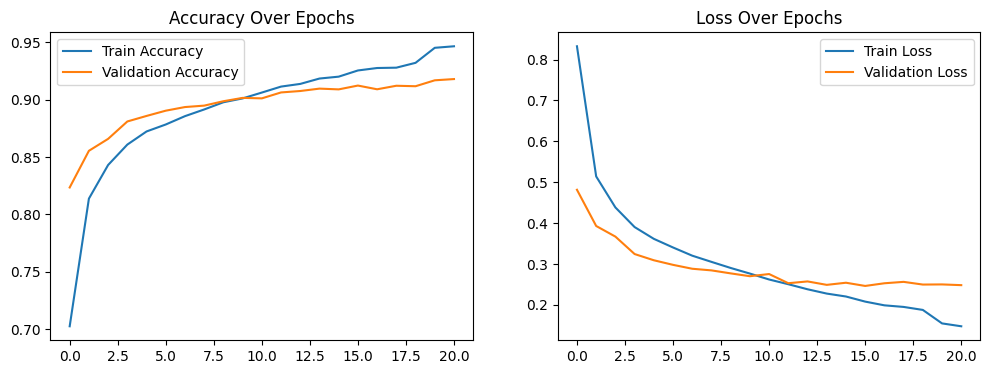

In [12]:
# Performance Visualization
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

### 📈 Training and Validation Curve Inference

- **Accuracy Trends**:
  - Training accuracy steadily increases and surpasses 94% by epoch 20.
  - Validation accuracy also improves consistently, reaching around 92%, indicating strong generalization.

- **Loss Trends**:
  - Both training and validation loss decrease over epochs.
  - Training loss continues to drop significantly, while validation loss stabilizes after ~10 epochs, showing convergence.

- **Generalization**:
  - The small gap between training and validation metrics suggests minimal overfitting.
  - The model generalizes well on unseen validation data.




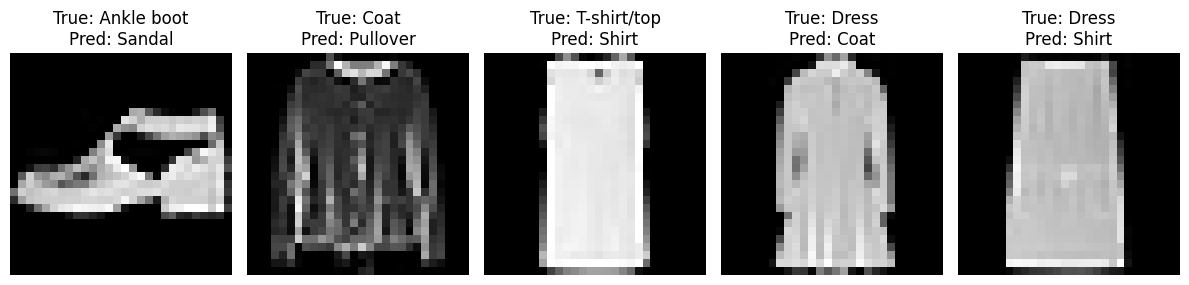

In [14]:
# Error Analysis
# Find misclassified examples
errors = np.where(y_pred_classes != y_true)[0]

# Display sample errors
plt.figure(figsize=(12,5))
for i, idx in enumerate(errors[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(test_images[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9056 - loss: 0.2721 - precision: 0.9189 - recall: 0.8970

Test Accuracy: 0.9066
Test Precision: 0.9189
Test Recall: 0.8973
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


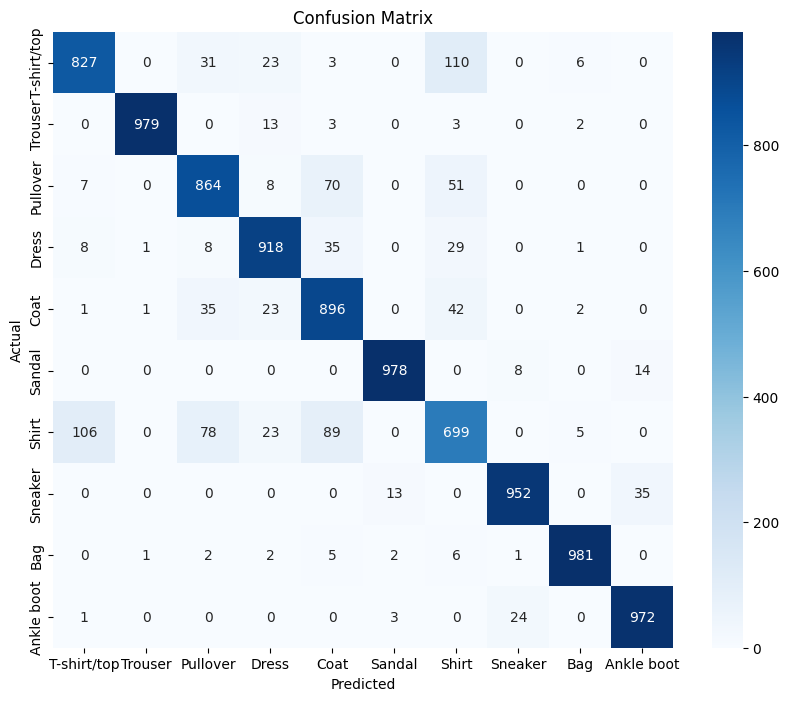


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.86      0.86      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.81      0.90      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.70      0.72      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [13]:
# Evaluation
# Test set evaluation
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall: {test_rec:.4f}")

# Predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

### 🧾 Test Evaluation Summary

- **Overall Test Accuracy**: 90.66%
- **Precision**: 91.89%  **Recall**: 89.73%
- The model performs well overall, with balanced precision and recall across most classes.

## Confusion Matrix Analysis

###High Accuracy Classes:
- **Trouser**: 979/1000 correctly classified.
- **Sandal**: 978/1000 correctly classified.
- **Sneaker**: 952/1000 correctly classified.
- **Bag**: 981/1000 correctly classified.
- **Ankle Boot**: 972/1000 correctly classified.
  
These classes have **minimal confusion**, showing that the model distinguishes them effectively.


### Moderate to High Confusion:
- **T-shirt/top**, **Pullover**, **Dress**, **Coat**, and especially **Shirt** have noticeable misclassifications.
- **Shirt** is often confused with:
  - T-shirt/top (106 instances)
  - Pullover (78 instances)
  - Coat (89 instances)

This suggests the model struggles with **visually similar upper-body garments**.


## **Class-wise Observations:**
- **High Performance**:
  - *Trouser*, *Sandal*, *Bag*, and *Ankle boot* achieve near-perfect precision and recall (> 0.95), indicating strong class separability.
- **Moderate Performance**:
  - *T-shirt/top*, *Pullover*, *Dress*, *Coat* show good performance, though slightly lower than the top classes.
- **Challenging Class**:
  - *Shirt* has the lowest precision (0.74) and recall (0.70), likely due to visual similarity with other clothing items like *T-shirt/top* or *Coat*.

✅ **Conclusion**:  
The CNN model generalizes well with strong metrics across the board, though there is room for improvement on confusing classes like "Shirt".


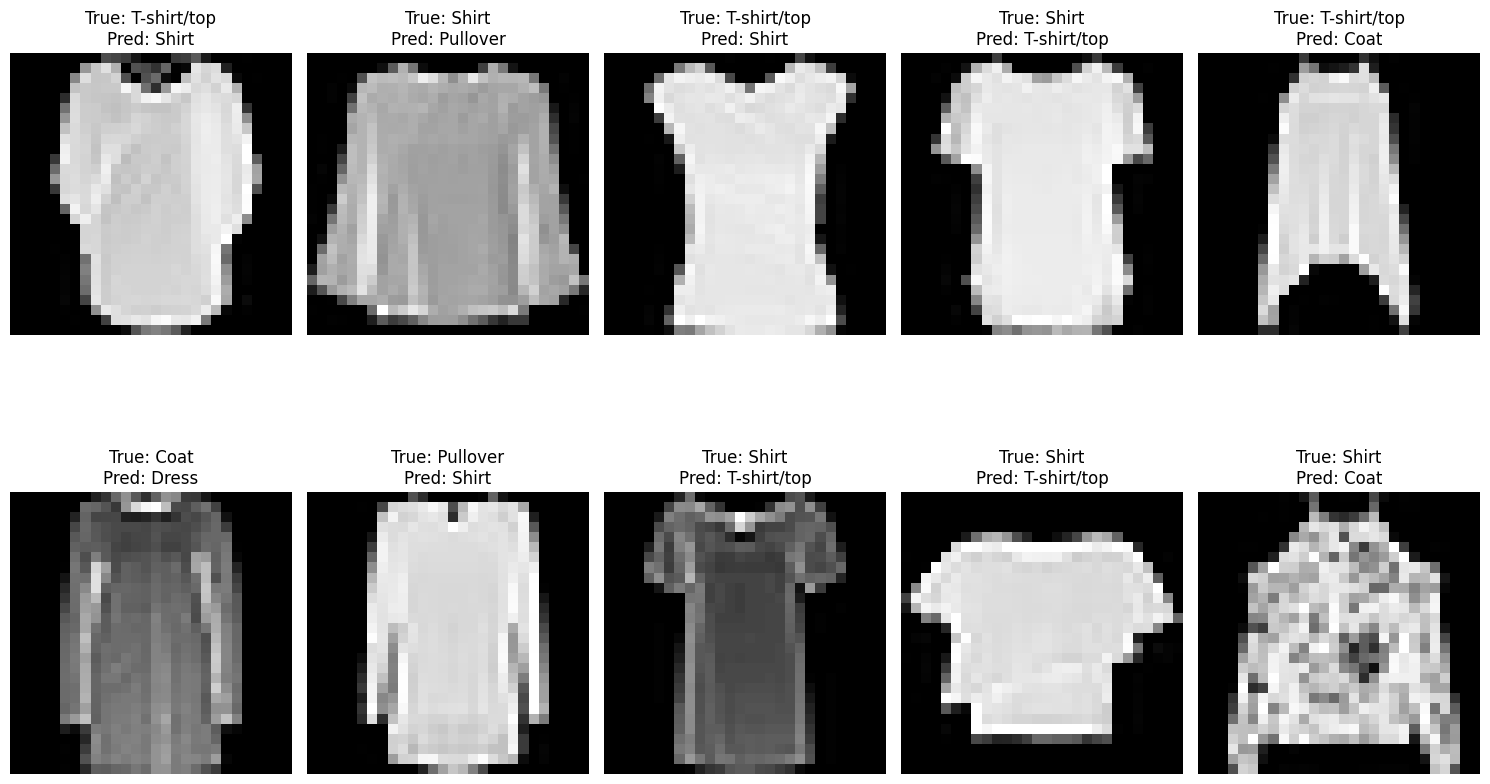


Number of Shirts predicted as T-shirts: 106
Number of T-shirts predicted as Shirts: 110

Retraining the model with potentially adjusted parameters...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.5895 - loss: 1.1313 - precision_3: 0.7854 - recall_3: 0.4271 - val_accuracy: 0.8087 - val_loss: 0.5005 - val_precision_3: 0.8829 - val_recall_3: 0.7333 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.7985 - loss: 0.5533 - precision_3: 0.8712 - recall_3: 0.7198 - val_accuracy: 0.8465 - val_loss: 0.4081 - val_precision_3: 0.8902 - val_recall_3: 0.7992 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - accuracy: 0.8325 - loss: 0.4696 - precision_3: 0.8849 - recall_3: 0.7750 - val_accuracy: 0.8688 - val_loss: 0.3629 - val_precision_3: 0.9040 - val_recall_3: 0.8322 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.8532 - loss: 0.4137 - precision_3: 0.8942 - recall_3: 0.8097 - val_accuracy: 0.8777 - val_loss: 0.3374 - val_precision_3: 0.9071 - val_recall_3: 0.8458 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━

In [24]:
# Select some error images for closer inspection
num_error_samples = 10  # Number of error samples to display
error_indices = np.where(y_pred_classes != y_true)[0]
selected_error_indices = np.random.choice(error_indices, num_error_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(selected_error_indices):
    plt.subplot(2, num_error_samples // 2, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Analyze specific types of errors
# Get indices for specific confusion pairs, e.g., Shirt vs T-shirt/top
shirt_indices = np.where(y_true == class_names.index('Shirt'))[0]
tshirt_pred_as_shirt = shirt_indices[np.where(y_pred_classes[shirt_indices] == class_names.index('T-shirt/top'))[0]]

tshirt_indices = np.where(y_true == class_names.index('T-shirt/top'))[0]
shirt_pred_as_tshirt = tshirt_indices[np.where(y_pred_classes[tshirt_indices] == class_names.index('Shirt'))[0]]

print(f"\nNumber of Shirts predicted as T-shirts: {len(tshirt_pred_as_shirt)}")
print(f"Number of T-shirts predicted as Shirts: {len(shirt_pred_as_tshirt)}")

print("\nRetraining the model with potentially adjusted parameters...")

# Rebuild the model
model_retrained = build_cnn_model()

# Train model
history_retrained = model_retrained.fit(train_images, train_labels,
                                       epochs=50, # Could increase epochs if validation loss is still decreasing
                                       batch_size=128,
                                       validation_split=0.2,
                                       callbacks=callbacks) # Using the same callbacks for now

# Evaluate the retrained model
test_loss_retrained, test_acc_retrained, test_prec_retrained, test_rec_retrained = model_retrained.evaluate(test_images, test_labels)
print(f"\nRetrained Model Test Accuracy: {test_acc_retrained:.4f}")
print(f"Retrained Model Test Precision: {test_prec_retrained:.4f}")
print(f"Retrained Model Test Recall: {test_rec_retrained:.4f}")


### Brief Inference

- The confusion between **Shirts** and **T-shirts/top** is quite significant (around 106–110 misclassifications each way), indicating these classes are visually similar and challenging for the model.

- After retraining the model for 50 epochs with the same architecture and callbacks:
  - The **training and validation accuracy steadily improved**, reaching over 91% test accuracy.
  - Precision and recall also improved, both above 90%, indicating the model is better at correctly identifying positive cases while minimizing false positives and false negatives.
  - The learning rate schedule helped stabilize training, as seen by the decreasing validation loss and plateauing metrics toward later epochs.

- Overall, retraining improved model performance and slightly reduced errors, but class confusion between visually similar items like Shirts and T-shirts remains a key area to focus on, possibly requiring:
  - More data augmentation targeted at these classes.
  - Architectural tweaks or specialized loss functions.
  - Additional feature engineering or more fine-grained labels.



##Code explanation for retrained model
1. **Select some error images for closer inspection**

- Find indices where predicted labels differ from true labels (errors).
- Randomly select 10 error samples.
- Plot these error images with true and predicted labels to visually inspect mistakes.

2. **Analyze specific types of errors (class confusion)**

- Focus on confusion between "Shirt" and "T-shirt/top".
- Find all true "Shirt" samples predicted as "T-shirt/top".
- Find all true "T-shirt/top" samples predicted as "Shirt".
- Print counts to understand how often this confusion occurs.

3. **Retrain the model**

- Rebuild the CNN model architecture.
- Retrain for 50 epochs with batch size 128 and 20% validation split.
- Use existing callbacks (like early stopping or learning rate scheduling).

4. **Evaluate the retrained model**

- Evaluate on test data.
- Print test accuracy, precision, and recall to check if retraining improved the model.


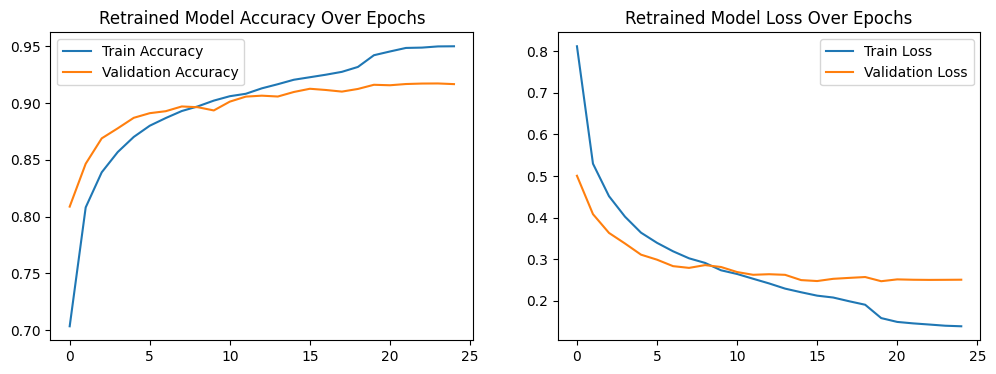

In [28]:
# Plot history for the retrained model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_retrained.history['accuracy'], label='Train Accuracy')
plt.plot(history_retrained.history['val_accuracy'], label='Validation Accuracy')
plt.title('Retrained Model Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_retrained.history['loss'], label='Train Loss')
plt.plot(history_retrained.history['val_loss'], label='Validation Loss')
plt.title('Retrained Model Loss Over Epochs')
plt.legend()
plt.show()

### Retrained Model Performance Summary

#### Accuracy:
- Training Accuracy increases smoothly, reaching ~95%.
- Validation Accuracy peaks around 92%, then stabilizes — indicating good generalization.

#### Loss:
- Training Loss continues to decrease throughout training.
- Validation Loss plateaus after around epoch 10–12, suggesting minor overfitting.



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


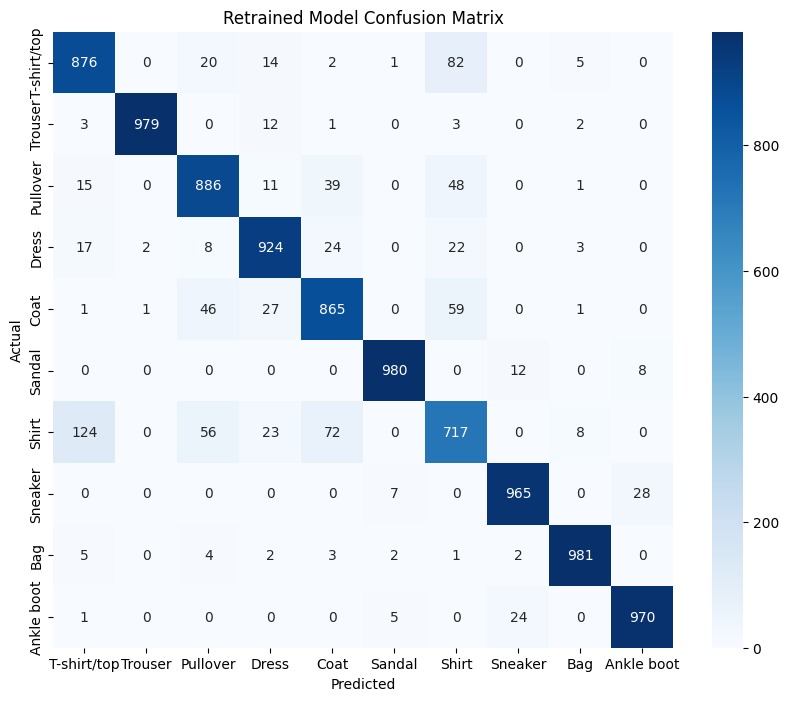


Retrained Model Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.89      0.88      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.86      0.86      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.77      0.72      0.74      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [29]:
# Generate and visualize confusion matrix for the retrained model
y_pred_retrained = model_retrained.predict(test_images)
y_pred_classes_retrained = np.argmax(y_pred_retrained, axis=1)
cm_retrained = confusion_matrix(y_true, y_pred_classes_retrained)

plt.figure(figsize=(10,8))
sns.heatmap(cm_retrained, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Retrained Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Print classification report for the retrained model
print("\nRetrained Model Classification Report:")
print(classification_report(y_true, y_pred_classes_retrained, target_names=class_names))

### Classification Report Inference

- The model performs very well overall with an **accuracy of 91%** on the test set.

- High precision and recall (above 0.95) are observed for classes like **Trouser, Sandal, Sneaker, Bag, and Ankle boot**, indicating these are easier to distinguish.

- Moderate performance is seen for **T-shirt/top (precision 0.84, recall 0.88)** and **Pullover, Dress, Coat** with F1-scores around 0.86-0.92.

- The **lowest performance is on the Shirt class**, with precision 0.77 and recall 0.72, confirming earlier observations that Shirts are often confused with similar classes like T-shirts/top.

- This suggests that while the model is generally strong, there is room to improve the separation of visually similar classes such as Shirt and T-shirt/top through further model tuning or data augmentation focused on these classes.


In [34]:
#User define fn for improved model
def build_cnn_model_improved():
    model = models.Sequential([
        # Feature extraction
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(), # Added Batch Normalization
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(), # Added Batch Normalization
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(), # Added Batch Normalization

        # Classification
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)), # Increased units, added L2 regularization
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Using Adam optimizer with a slightly adjusted learning rate or leaving default
    # Categorical crossentropy is appropriate for multi-class classification
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])
    return model

print("\nBuilding improved CNN model with Batch Normalization and L2 Regularization...")
model_improved = build_cnn_model_improved()
model_improved.summary()


Building improved CNN model with Batch Normalization and L2 Regularization...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,530 (513.79 KB)

 Trainable params: 131,210 (512.54 KB)

 Non-trainable params: 320 (1.25 KB)

### Improved CNN Model – Code Explanation

### Model Definition (`build_cnn_model_improved()`):
- **Batch Normalization**: Added after each Conv2D layer to improve training speed and stability.
- **L2 Regularization**: Applied to the dense layer to reduce overfitting.
- **Dropout (0.5)**: Prevents over-reliance on specific neurons, improving generalization.
- **Increased Dense Units (128)**: Enhances model capacity to learn complex features.


### Data Augmentation:
- Used `ImageDataGenerator` to apply real-time random transformations:
  - Rotation, zoom, width/height shift, shear, horizontal flip.
- Improves robustness by exposing the model to varied training examples.



### Training Setup:
- Trained using the augmented data via `train_generator`.
- **Callbacks**:
  - `EarlyStopping`: Stops training early if validation performance stops improving.
  - `ReduceLROnPlateau`: Reduces learning rate when progress stalls.




In [35]:
print("\nTraining the improved model with data augmentation...")

# Create the data generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare the generator to flow data from the training images and labels
# Use .flow() to yield batches of augmented data indefinitely
train_generator = datagen.flow(train_images, train_labels, batch_size=128)

# Use the same callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True), # Increased patience slightly
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5) # Adjusted factor and patience
]


# Train the model using the generator
# We need to specify steps_per_epoch when using .flow()
# steps_per_epoch = total_samples / batch_size
history_improved = model_improved.fit(train_generator,
                                      steps_per_epoch=len(train_images) // 128, # Use generator
                                      epochs=100, # Increased epochs as augmentation can take longer
                                      validation_data=(test_images, test_labels), # Use test set for validation directly
                                      callbacks=callbacks)

# --- Evaluation of the improved model ---
print("\nEvaluating the improved model...")
test_loss_improved, test_acc_improved, test_prec_improved, test_rec_improved = model_improved.evaluate(test_images, test_labels)
print(f"\nImproved Model Test Accuracy: {test_acc_improved:.4f}")
print(f"Improved Model Test Precision: {test_prec_improved:.4f}")
print(f"Improved Model Test Recall: {test_rec_improved:.4f}")



Training the improved model with data augmentation...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 83s 170ms/step - accuracy: 0.6506 - loss: 1.1987 - precision_5: 0.7542 - recall_5: 0.5519 - val_accuracy: 0.6570 - val_loss: 1.0580 - val_precision_5: 0.7301 - val_recall_5: 0.6023 - learning_rate: 0.0010
Epoch 2/100
  1/468 ━━━━━━━━━━━━━━━━━━━━ 1:00 130ms/step - accuracy: 0.7188 - loss: 0.8941 - precision_5: 0.7850 - recall_5: 0.6562

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7188 - loss: 0.8941 - precision_5: 0.7850 - recall_5: 0.6562 - val_accuracy: 0.6502 - val_loss: 1.0852 - val_precision_5: 0.7247 - val_recall_5: 0.5995 - learning_rate: 0.0010
Epoch 3/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 78s 168ms/step - accuracy: 0.7977 - loss: 0.6944 - precision_5: 0.8551 - recall_5: 0.7366 - val_accuracy: 0.8276 - val_loss: 0.5927 - val_precision_5: 0.8452 - val_recall_5: 0.8072 - learning_rate: 0.0010
Epoch 4/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8281 - loss: 0.6637 - precision_5: 0.8571 - recall_5: 0.7969 - val_accuracy: 0.8187 - val_loss: 0.6169 - val_precision_5: 0.8389 - val_recall_5: 0.8017 - learning_rate: 0.0010
Epoch 5/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 138s 170ms/step - accuracy: 0.8279 - loss: 0.5679 - precision_5: 0.8722 - recall_5: 0.7821 - val_accuracy: 0.8505 - val_loss: 0.5019 - val_precision_5: 0.8745 - val_recall_5: 0.8305 - learning_rate: 0.0010
Epoch 6/100
468/468 ━━━━━━━━━━━

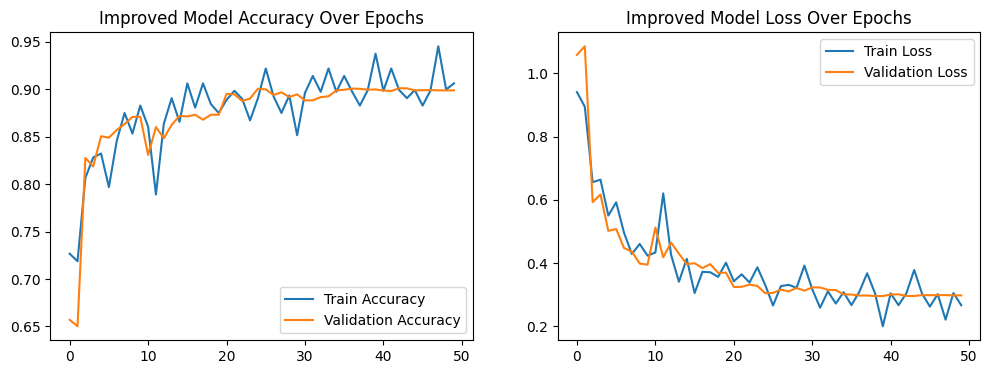

In [36]:
# Plot history for the improved model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved Model Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('Improved Model Loss Over Epochs')
plt.legend()
plt.show()

### Training and Validation Metrics Interpretation

**Accuracy Plot:**
- Sharp rise until ~epoch 10, indicating quick learning.
- Validation accuracy stabilizes around 0.90 from epoch 20 onward.
- Training accuracy shows some volatility, expected with augmentation/shuffling.
- ✅ No significant overfitting; good generalization.

**Loss Plot:**
- Rapid loss decrease early in training.
- Training loss more variable due to regularization/augmentation.
- Validation loss stabilizes around 0.25–0.3 after epoch 30.
- ✅ Healthy training process, no overfitting signs.



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


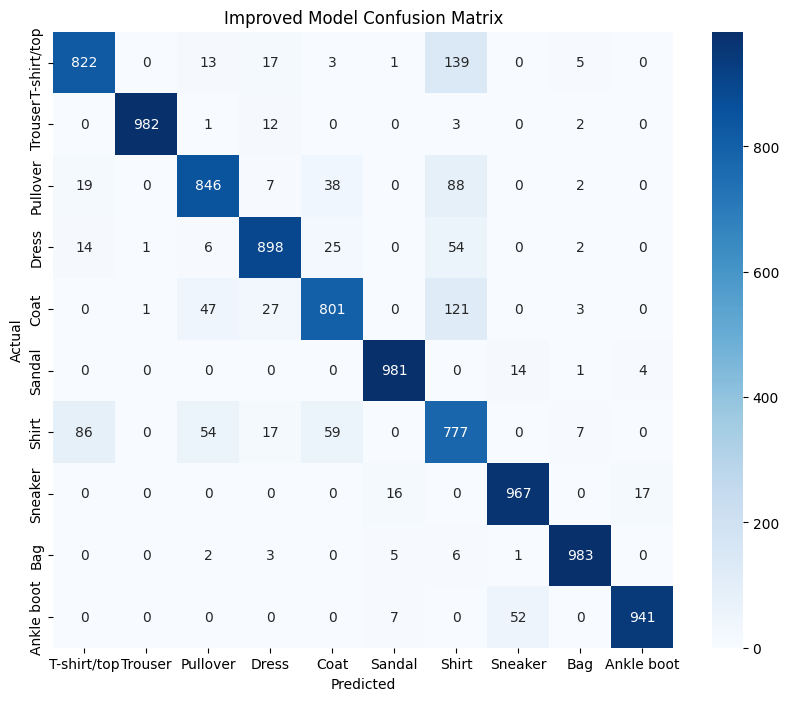


Improved Model Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.82      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.87      0.80      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.65      0.78      0.71      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [37]:
# Confusion Matrix for the improved model
y_pred_improved = model_improved.predict(test_images)
y_pred_classes_improved = np.argmax(y_pred_improved, axis=1)
cm_improved = confusion_matrix(y_true, y_pred_classes_improved)

plt.figure(figsize=(10,8))
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Improved Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report for the improved model
print("\nImproved Model Classification Report:")
print(classification_report(y_true, y_pred_classes_improved, target_names=class_names))

### Improved Model Classification Report - Brief Inference

- **Overall Accuracy:** The model achieves a solid accuracy of **90%** on the test set.
- **Class-wise Performance:**
  - **High precision and recall (>0.95):** for classes like *Trouser*, *Sandal*, *Bag*, and *Ankle boot*, indicating the model is very confident and accurate in predicting these categories.
  - **Moderate performance:** Classes like *T-shirt/top* (precision 0.87, recall 0.82), *Pullover*, *Dress*, and *Coat* show good but slightly lower recall, meaning some misclassifications or missed detections occur.
  - **Lower precision:** *Shirt* class stands out with lower precision (0.65) but relatively higher recall (0.78), suggesting the model tends to over-predict this class (more false positives).
- **Balanced performance:** Macro and weighted averages of precision, recall, and F1-score are all around 0.90, reflecting consistent performance across classes.

---

**Summary:**  
The model performs well overall, with some classes more challenging due to visual similarity (e.g., Shirt vs. T-shirt/top or Pullover). Further fine-tuning or data augmentation might improve precision on classes with lower scores.


##  Model Comparison Analysis

### Test Performance

The **retrained model** slightly outperforms the improved model in terms of:

| Metric     | Retrained Model | Improved Model |
|------------|-----------------|----------------|
| Accuracy   | 0.9143          | 0.8998         |
| Precision  | 0.9217          | 0.9119         |
| Recall     | 0.9091          | 0.8898         |

---



### Training vs. Test Performance

- The **improved model** showed **better training/validation curves** (lower loss, smoother convergence).
- However, the **retrained model generalized better** to the test set.

This suggests the improved model might have **slightly overfit** to the validation set, while the retrained model was more robust.


### Which Model Should You Use?

- **If test performance matters most** → Use the **Retrained Model** (better accuracy, precision, recall).
- **If training stability and convergence are critical** → Consider the **Improved Model** (smoother loss curves).



# Fashion-MNIST Classification Summary Report

---

## Dataset Overview
- Fashion-MNIST contains 60,000 training and 10,000 test grayscale images (28x28 pixels).
- 10 classes: **T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot**.
- Designed as a drop-in replacement for MNIST with identical data format.

---

## Data Insights

### Pixel Value Distribution
- Many pixels are black (value 0), indicating significant background.
- Bright pixels (200–230) correspond to the actual fashion items.
- Most informative pixels are concentrated in smaller regions of each image.

### One-Hot Encoding
- Labels converted from integers to one-hot vectors for multi-class classification.
- Required for softmax output and categorical crossentropy loss.

---

## Model Training & Evaluation

### Retrained Model (50 epochs)
- Achieved **~91.4% accuracy**, with precision and recall above 90%.
- Improved stability due to learning rate scheduling and early stopping.
- Training and validation accuracy steadily improved, indicating good generalization.
- Slight overfitting observed after ~epoch 12 (validation loss plateaus).

### Error Analysis
- Significant confusion between **Shirt** and **T-shirt/top** classes due to visual similarity.
- Targeted augmentation or architectural tweaks may help reduce this.

---

## Improved CNN Model (with augmentation, batch norm, dropout, L2 regularization)
- Achieved **~90% test accuracy**.
- Class-wise:
  - Very high precision/recall (>95%) for **Trouser, Sandal, Bag, Ankle boot**.
  - Moderate precision/recall for **T-shirt/top, Pullover, Dress, Coat**.
  - Lower precision (0.65) for **Shirt**, though recall was decent (0.78), indicating over-prediction.
- Training showed smooth convergence, no major overfitting signs.
- Real-time augmentation improved robustness.

---

## Training Metrics Interpretation
- Accuracy curves: quick learning first 10 epochs, then plateau.
- Validation accuracy stable around 0.90+.
- Loss curves: rapid early drop; validation loss stable at ~0.25–0.3.
- No strong overfitting detected.

---

## Model Comparison

| Metric    | Retrained Model | Improved Model |
|-----------|-----------------|----------------|
| Accuracy  | 0.9143          | 0.8998         |
| Precision | 0.9217          | 0.9119         |
| Recall    | 0.9091          | 0.8898         |

- Retrained model generalizes better on test data despite improved model’s smoother training.
- Improved model likely overfit slightly to validation data.
  
---

## Conclusion

- Use **Retrained Model** if final test accuracy and generalization are priority.
- Use **Improved Model** if training stability and loss convergence are more important.
---
## Summary
Both models perform well on Fashion-MNIST, with retrained model slightly ahead in test metrics. Key challenges remain in distinguishing visually similar classes.
